<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2025
</center></h1>

<h2><center>Assignment 2 – PS8 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
     <li><div class="alert-warning">All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready. Most effective visuals would fetch maximum credits</div></li>    
    <li><div class="alert-warning">Submissions done via means other than Taxila will strictly be NOT graded.</div></li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: 55</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
  </tr>
  <tr>
    <td>ANITHA R</td>
    <td>2024DA04165</td>
  </tr>
  <tr>
    <td>MOHAMMED MUDASSIRULLAH SHERIFF</td>
    <td>2024DA04200</td>
  </tr>
  <tr>
    <td>SAI POOJA M S</td>
    <td>2024DA04202</td>
  </tr>
   <tr>
    <td>VINOTH TS</td>
    <td>2024DA04220</td>
  </tr>
</table>

<h3>Objective</h3>
<h4>Identify the features which have high impact on attrition</h4>

##  Download and Prep the Data: 1 Mark

Import the modules needed

In [183]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Download the dataset and read it into a dataframe

In [184]:
dataset = 'dvi-a2-ps8-data.csv'
df = pd.read_csv(dataset)

First five items in the dataset.

In [185]:
pd.set_option('display.max_columns', None)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,80,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,2,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,80,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,4,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,80,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,5,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,80,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,7,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,80,6,2,2,2


Find out how many entries there are in the dataset.

In [186]:
rows, columns = df.shape
print(f"Number of rows: {rows}, Number of columns: {columns}")

Number of rows: 1470, Number of columns: 23


Clean up data. <br>
Remove unnecessary columns. Mention the reasons.<br>
Show the data.

a. Clean up Data

In [187]:
# Check for data types
df.info()
print("\n")

#Check for null/missing values
missing_values = df.isna().sum()
if missing_values.any():
    print("Missing values in each column:")
    print(missing_values)
else:
    print("No missing values found in the dataset.")
print("\n")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Duplicate rows found: {duplicate_rows}")
else:
    print("No duplicate rows found in the dataset.")
print("\n")

# Check for unique values in each column
print("Unique values for categorical columns:")                   
for col in df.select_dtypes(include=['object', 'category']):
    print(f"Column: {col}, No:of Unique valaues: {df[col].nunique()}, Values: {df[col].unique()}")

print("\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1470 non-null   int64 
 1   Attrition             1470 non-null   object
 2   BusinessTravel        1470 non-null   object
 3   DailyRate             1470 non-null   int64 
 4   Department            1470 non-null   object
 5   DistanceFromHome      1470 non-null   int64 
 6   Education             1470 non-null   object
 7   EducationField        1470 non-null   object
 8   EmployeeNumber        1470 non-null   int64 
 9   Gender                1470 non-null   object
 10  JobRole               1470 non-null   object
 11  JobSatisfaction       1470 non-null   object
 12  MaritalStatus         1470 non-null   object
 13  MonthlyIncome         1470 non-null   int64 
 14  NumCompaniesWorked    1470 non-null   int64 
 15  OverTime              1470 non-null   

<h4>Summary of clean up:</h4>
    The output shows that there are no missing values and no duplicates so no imputation is needed.

b. Remove Unnecessary Columns

In [188]:

df_cleaned = df.drop(columns=['EmployeeNumber', 'StandardHours'])
print("Columns 'EmployeeNumber' and 'StandardHours' have been removed.")


Columns 'EmployeeNumber' and 'StandardHours' have been removed.


Reasons for removal:
- EmployeeNumber: This is just a unique identifier for each employee and has no predictive power or analytical value.
- StandardHours: This column has a single, constant value (80) for all employees, which means it has zero variance and provides no information for analysis.

c. Show the data

In [189]:
df_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Gender,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Female,Sales Executive,Very High,Single,5993,8,Yes,11,Excellent,8,6,4,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,Male,Research Scientist,Medium,Married,5130,1,No,23,Outstanding,10,10,7,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Male,Laboratory Technician,High,Single,2090,6,Yes,15,Excellent,7,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Female,Research Scientist,High,Married,2909,1,Yes,11,Excellent,8,8,7,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Male,Laboratory Technician,Medium,Married,3468,9,No,12,Excellent,6,2,2,2


# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Find the correlation between all numerical features.<br><br>
    Write the python code in the below cell to create appropriate visual to perform the above task.
    <h4>Answer in markdown cells below the visual <br><br>
        1.Summarise your findings from the visual.<br>
            2.The reason for selecting the chart type you did <br>
                3.Mention the pre-attentive attributes used.(atleast 2)<br>
                    4.Mention the gestalt principles used.(atleast 2)<br>
   

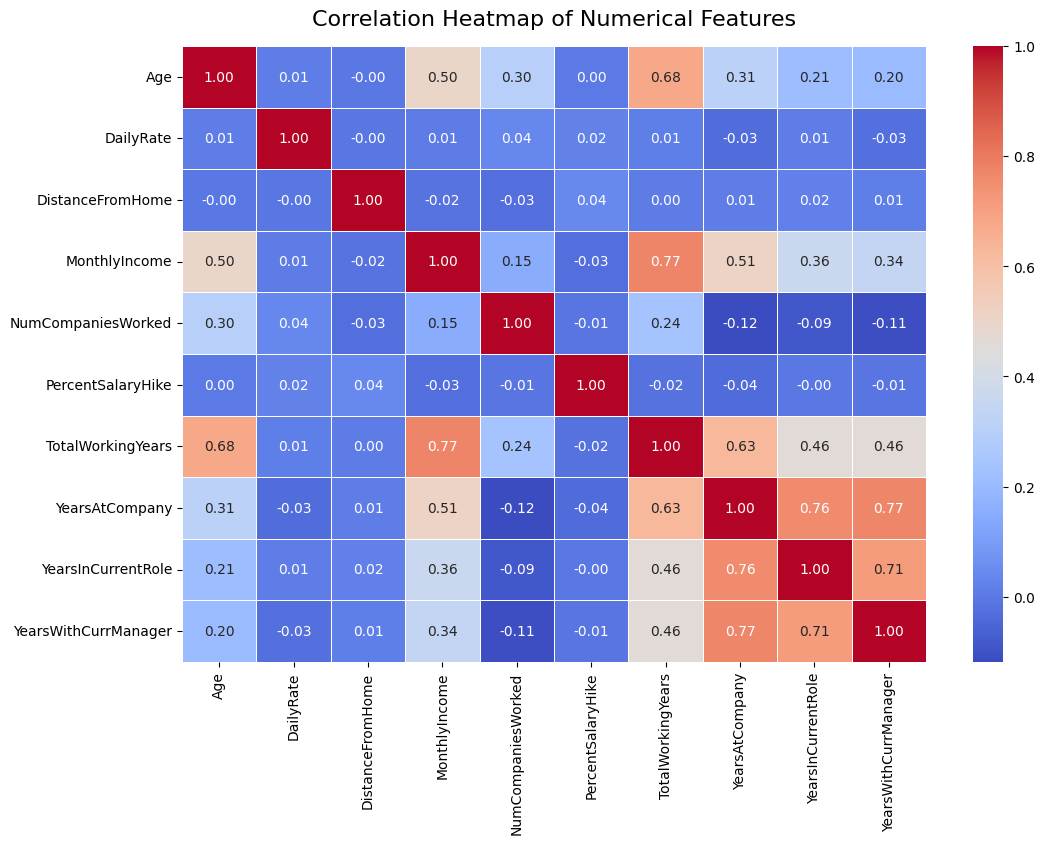

In [190]:
# Compute correlation matrix only for numerical columns
corr_matrix = df_cleaned.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)

# Title
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


<section>
<h4>Summary of Findings</h4>
<ul>
  <li>The heatmap clearly shows how the numerical features are related to each other.</li>
  <li>Darker shades (closer to +1 or -1) indicate stronger positive or negative relationships, while lighter shades (closer to 0) show weak or no correlation.</li>
  <li>This helps us quickly spot which features move together and which ones are fairly independent.</li>
</ul>
<h4>Why I chose a Heatmap ?</h4>
<ul>
  <li>A correlation matrix has a lot of numbers, and a heatmap makes it much easier to see patterns at a glance.</li>
  <li>The color gradient highlights strong and weak relationships instantly, without needing to read every single value.</li>
</ul>

<h4>Pre-attentive Attributes Used</h4>
<ul>
  <li>Color intensity : Strong correlations stand out with deeper colors.</li>
  <li>Spatial arrangement (position): The grid layout makes it simple to compare one feature with another.</li>
</ul>

<h4>Gestalt Principles Applied</h4>
<ul>
  <li>Similarity: Cells with the same color shade are seen as belonging together, which helps identify groups of correlated features.</li>
  <li>Proximity: Since related features are positioned next to each other in the grid, our eyes naturally connect them.</li>
</ul>
</section>

### Question 2
<h4>Find the distribution of age in the dataset. Identify which age group is most prone to attrition.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


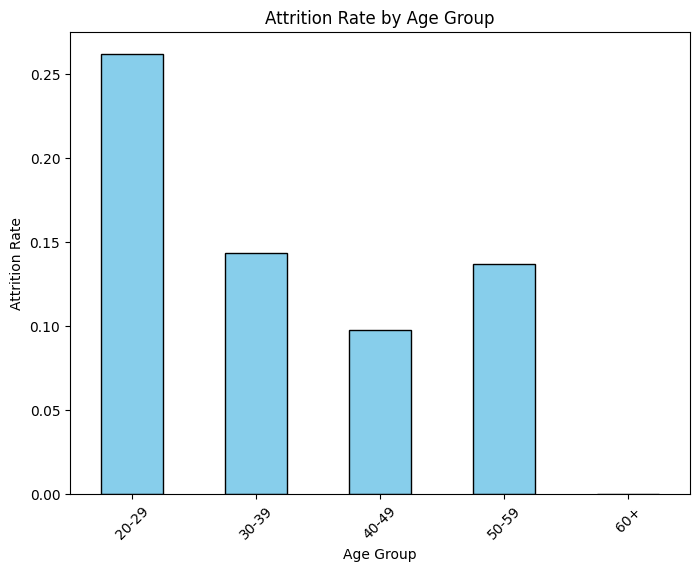

The age group most prone to attrition is: 20-29


In [191]:
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-29', '30-39', '40-49', '50-59', '60+']

df_cleaned_copy = df_cleaned.copy()

df_cleaned_copy['AgeGroup'] = pd.cut(df_cleaned_copy['Age'], bins=bins, labels=labels, right=False)

# Calculate attrition rate by age group
attrition_by_age = df_cleaned_copy.groupby('AgeGroup', observed=False)['Attrition'].apply(lambda x: (x=="Yes").mean())

# Plot distribution
plt.figure(figsize=(8,6))
attrition_by_age.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Attrition Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.show()

# Print most attrition-prone group
most_prone = attrition_by_age.idxmax()
print(f"The age group most prone to attrition is: {most_prone}")

<section>
<h4>Findings from the Visual</h4>
<ul>
    <li>The 20–29 age group shows the highest attrition rate.</li>
    <li>Attrition decreases in older groups, suggesting younger employees are more likely to leave compared to mid-career or senior employees.</li>
</ul>

<h4>The reason for selecting the chart type</h4>
<ul>
    <li>A bar chart was chosen because it clearly shows comparisons of attrition rates across discrete age groups.</li>
</ul>

<h4>Pre-attentive attributes used</h4>
<ul>
    <li>Length (bar height): The varying bar heights immediately draw attention to differences in attrition rates.</li>
    <li>Color (sky blue fill): Uniform coloring distinguishes the bars from the background, keeping focus on magnitude rather than categories.</li>
</ul>

<h4>Gestalt Principles Used</h4>
<ul>        
    <li>Proximity: Bars positioned close together along the x-axis are perceived as part of the same category group (age distribution).</li>
    <li>Similarity: All bars have the same shape and color, signaling that they belong to the same type of data (attrition rate).</li>
</ul>
</section>

### Question 3
<h4>Analyse the departmentwise attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


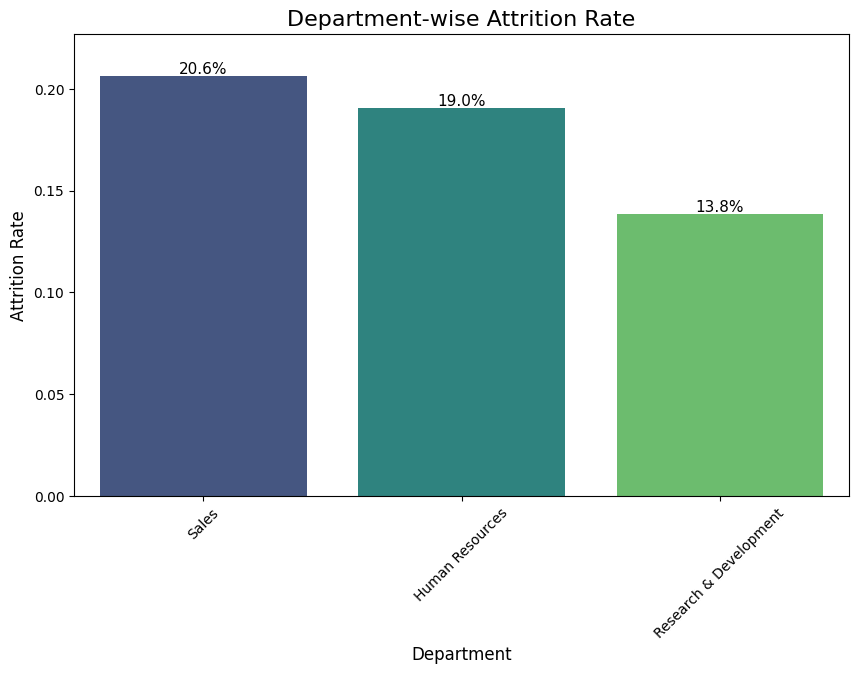

In [192]:
df_attritin_rate = df_cleaned.copy()
df_attritin_rate['Attrition_numeric'] = df_attritin_rate['Attrition'].map({'Yes': 1, 'No': 0})

dept_attrition = df_attritin_rate.groupby('Department')['Attrition_numeric'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Department', y='Attrition_numeric', data=dept_attrition, palette='viridis', hue='Department', legend=False)
plt.title('Department-wise Attrition Rate', fontsize=16)
plt.xlabel('Department', fontsize=12)
plt.ylabel('Attrition Rate', fontsize=12)
plt.xticks(rotation=45)

# Add percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                textcoords='offset points')
plt.ylim(0, dept_attrition['Attrition_numeric'].max() * 1.1)
plt.show()

<section>
<h4>Findings from the visual.</h4>
<ul>
   <li>The bar chart shows that the Sales department has the highest attrition rate at 20.6%.</li> 
   <li>It is followed by the Human Resources department at 19.0%, and the Research & Development department has the lowest attrition rate at 13.8%.</li> 
   <li>This suggests that factors specific to the sales environment may be contributing to higher employee turnover.</li>
</ul>

<h4>The reason for selecting the chart type.</h4>
<ul>
   <li>A bar chart is the most effective visual for comparing a numerical value (attrition rate) across different discrete categories (departments).</li> 
   <li>The length of the bars provides a clear and immediate comparison of the rates, making it easy to identify which department has the highest and lowest attrition.</li>
</ul>

<h4>Pre-attentive attributes used (atleast 2)</h4>
<ul>
<li>Length: The different lengths of the bars are instantly perceived, allowing for a quick comparison of attrition rates without needing to read the exact numbers.</li>
<li>Color: While the colors here are primarily for aesthetic appeal, the distinct hue for each bar helps in segregating the departments visually.</li>
</ul>

<h4>Gestalt principles used (atleast 2).</h4>
<ul>
<li>Proximity: The bars are grouped closely together, which helps us perceive them as a single, related set of data for comparison.</li>
<li>Similarity: The bars are all the same width and orientation, which makes them easy to compare. This similarity allows us to focus solely on the difference in their lengths.</li>
</ul>
</section>

### Question 4
<h4>Identify the top 5 job roles with highest attrition rate.<br>

Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  


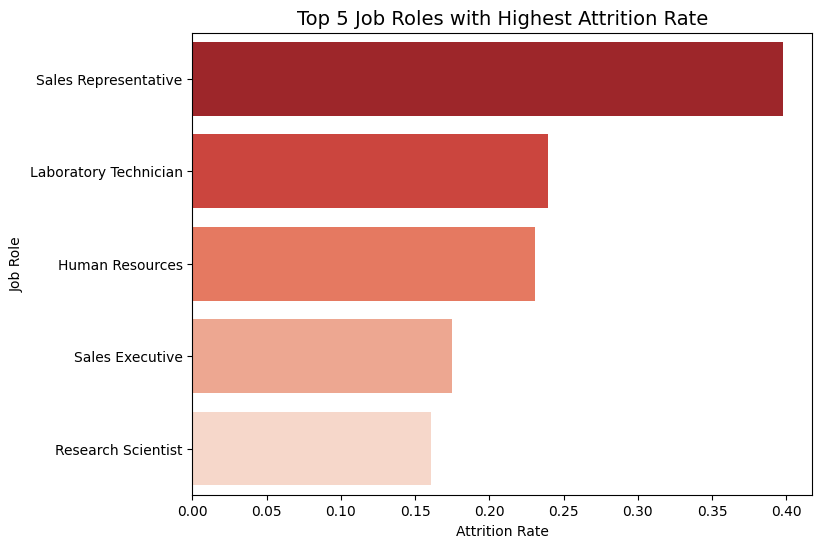

In [193]:
# Calculate attrition rate per job role
attrition_rate = (
    df_cleaned.groupby("JobRole")["Attrition"]
    .apply(lambda x: (x == "Yes").mean())
    .sort_values(ascending=False)
    .head(5)
)

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x=attrition_rate.values,
    y=attrition_rate.index,
    hue=attrition_rate.index,   # assign hue to avoid warning
    palette="Reds_r",
    legend=False
)

plt.title("Top 5 Job Roles with Highest Attrition Rate", fontsize=14)
plt.xlabel("Attrition Rate")
plt.ylabel("Job Role")
plt.show()

<section>
  <h4>Findings from the Visual</h4>
  <ul>
    <li>The bar chart highlights the top five job roles with the highest attrition rates.</li>
    <li>Some roles show noticeably higher attrition than others, indicating where
   targeted retention efforts(e.g., career paths, workload balancing, incentives) may be needed.</li>
    <li>This helps HR prioritize strategies for the most vulnerable roles.</li>
  </ul>

  <h4>Why I Chose this Chart Type</h4>
  <ul>
    <li>A horizontal bar chart is well-suited for comparing percentages across categories.</li>
    <li>It supports easy ranking, and longer job role names remain readable on the y-axis.</li>
  </ul>
  

  <h4>Pre-attentive Attributes Used</h4>
  <ul>
    <li>Length (bar size): Immediately communicates which roles have higher attrition.</li>
    <li>Color intensity: Darker shades draw attention to higher rates.</li>
  </ul>

  <h4>Gestalt Principles Applied</h4>
  <ul>
    <li>Similarity: Consistent bar shapes/styles make differences in length stand out.</li>
    <li>Proximity:Closely placed bars enable quick, side-by-side comparison.</li>
  </ul>
</section>

### Question 5
<h3> Multivariate analysis
<h4>Identify the top 2 highly correlated features.Analyse(use a single visual), how they relate to "number of years in the company" and their combined effect on attrition.<br>
    
Write the python code in the below cell to create the appropriate visual to perform the above task .
<h4>Answer in markdown cells below the visual <br><br>
    1.Summarise your findings from the visual.<br>
    2.The reason for selecting the chart type you did <br>
    3.Mention the pre-attentive attributes used.(atleast 2)<br>
    4.Mention the gestalt principles used.(atleast 2)<br>  

Top 2 correlated features: ['TotalWorkingYears', 'MonthlyIncome']
Plotting with X = MonthlyIncome, Y = TotalWorkingYears


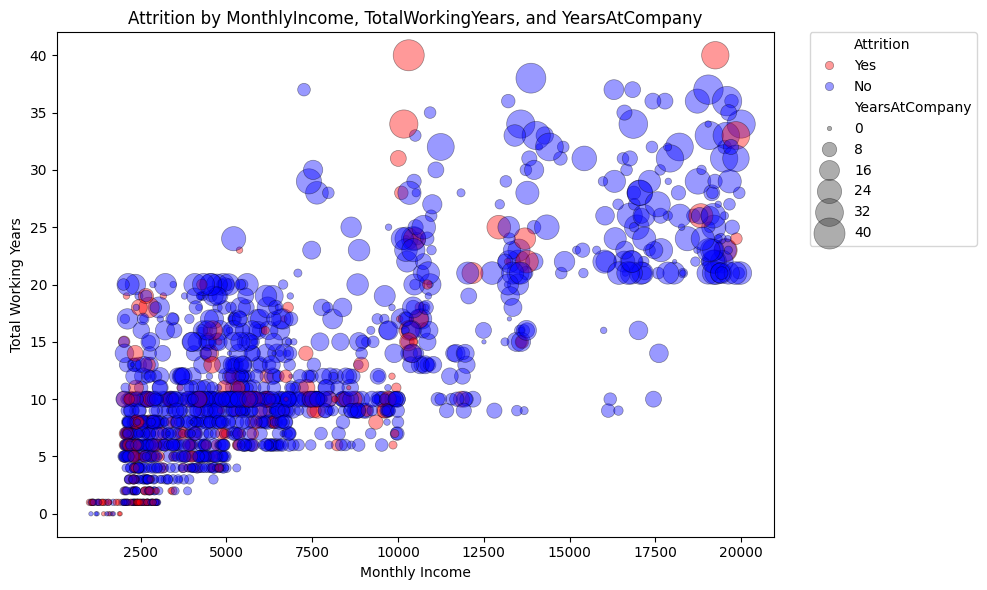

In [194]:
# --- Step 1: Check correlation with YearsAtCompany ---
corr_matrix = df_cleaned.corr(numeric_only=True)

corr_pairs = (
    corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
    .stack()
    .sort_values(ascending=False)
)

top_features = list(corr_pairs.index[0])  # tuple of the 2 most correlated features

# Force axes: x = MonthlyIncome, y = TotalWorkingYears
if "MonthlyIncome" in top_features and "TotalWorkingYears" in top_features:
    x_feat, y_feat = "MonthlyIncome", "TotalWorkingYears"
else:
    x_feat, y_feat = top_features  # fallback if dataset changes

print("Top 2 correlated features:", top_features)
print(f"Plotting with X = {x_feat}, Y = {y_feat}")

# Scatter plot with bubble sizes
palette = {"Yes": "red", "No": "blue"}

plt.figure(figsize=(10,6))
scatter =sns.scatterplot(
    data=df_cleaned,
    x=x_feat,      # X-axis now MonthlyIncome
    y=y_feat,  # Y-axis now TotalWorkingYears
    hue="Attrition",
    size="YearsAtCompany",
    sizes=(10, 500),   # adjust bubble sizes
    alpha=0.4,
    palette=palette,
    edgecolor="black",
    linewidth=0.5
)


# --- Step 5: Labels ---
plt.title("Attrition by MonthlyIncome, TotalWorkingYears, and YearsAtCompany")
plt.xlabel("Monthly Income")
plt.ylabel("Total Working Years")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0) 
plt.tight_layout()
plt.show()


<section>
<h4>Findings from Visual</h4>
<ul>
  <li>The features <strong>MonthlyIncome</strong> and <strong>TotalWorkingYears</strong> are strongly correlated, as identified using a correlation matrix.</li>
  <li>The <strong>number of years at the company</strong> tends to increase with both income and overall experience.</li>
  <li>Employees with longer tenure generally fall into the <strong>high-income and high-experience</strong category.</li>
  <li><strong>Attrition is highest</strong> among employees with lower experience, fewer years at the company, and a monthly income below ₹10,000.</li>
  <li>In the <strong>high-income, high-experience </strong> group, attrition tends to occur among those with the </strong> maximum years at the company</strong>.</li>
</ul>
<h4> Why I chose this chart type</h4>
<ul>
    <li>This scatter plot is ideal for visualizing multi-dimensional data.</li>
    <li>It allows viewers to simultaneously analyze how income, experience, and tenure relate to attrition.</li>
</ul>
<h4>Pre-Attentive features used</h4>
<ul>
<li>Size: Circle size conveys Years at Company without needing labels.</li>
<li>Colour: Different color distinguish attrition status quickly.</li>
</ul>

<h4>Gestalt Principles Applied</h4>
  <ul>
    <li>Similarity: Color coding helps group employees by attrition status.</li>
    <li>Proximity: Clusters of circles suggest groups with similar characteristics</li>
  </ul>
</section>

</section>

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>
  

<h4/>Identify how the attrition rate varies across different combinations of Gender and Marital Status

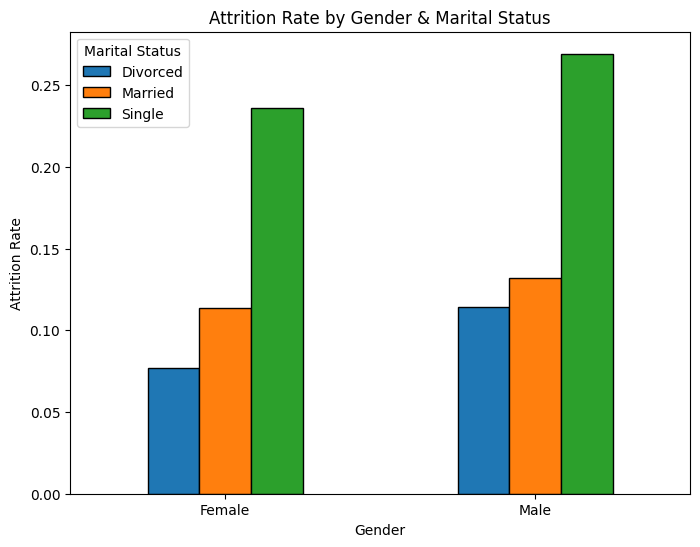

In [195]:
attrition_gender_marital = (
    df.groupby(['Gender', 'MaritalStatus'])['Attrition']
    .apply(lambda x: (x == "Yes").mean())
    .reset_index()
)

# Pivot for plotting (Gender on x-axis, grouped by Marital Status)
pivot_data = attrition_gender_marital.pivot(index='Gender', columns='MaritalStatus', values='Attrition')

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(8,6), edgecolor='black')

plt.title("Attrition Rate by Gender & Marital Status")
plt.ylabel("Attrition Rate")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.legend(title="Marital Status")
plt.show()

<section>
  <h4>Findings from the Visual</h4>
  <ul>
    <li>Single employees show the highest attrition rate across both genders.</li>
    <li>Married and divorced employees have significantly lower attrition rates.</li>
    <li>The gender difference is less pronounced than the marital status difference → meaning marital status plays a stronger role in attrition than gender.</li>
  </ul>

  <h4>Why I Chose this Chart Type</h4>
  <ul>
    <li>A grouped bar chart was chosen because it allows direct comparison of attrition rates across two categorical variables (Gender × Marital Status).</li>
    <li>Pie charts would not have worked well, since they fail to represent comparisons across multiple categories simultaneously.</li>
  </ul>
  

  <h4>Pre-attentive Attributes Used</h4>
  <ul>
    <li>Length (bar height): Makes it easy to compare attrition rates across categories.</li>
    <li>Color (different shades for Marital Status): Quickly distinguishes marital status groups within each gender.</li>
  </ul>

  <h4>Gestalt Principles Applied</h4>
  <ul>
    <li>Proximity: Bars grouped side-by-side under each gender are perceived as related categories.</li>
    <li>Similarity: Bars of the same color are perceived as belonging to the same marital status category.</li>
  </ul>
</section>

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>